In [18]:
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.ensemble import ExtraTreesClassifier, BaggingClassifier, AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier
import re
import pandas as pd
from time import time
from matplotlib import pyplot as plt
import copy



In [19]:
test_size = 0.25

data = pd.read_csv('data/BCCC-CIRA-CIC-DoHBrw-2020.csv')

all_inputs = data.iloc[:, :28]
all_labels = data.loc[:, 'Label']

In [20]:
data_pca = pd.read_csv('data/data_pca.csv')

all_inputs_pca = data_pca.iloc[:, :9]
all_labels_pca = data_pca.loc[:, 'Label']

MLPClassifier
[0.8558434  0.95688325 0.85860832 0.85049388 0.84037587 0.94912945
 0.86343418 0.90060108 0.8738329  0.86245241]
BaggingClassifier
[0.99973954 0.99959929 0.99965939 0.99961932 0.99967943 0.99949911
 0.99965939 0.99953917 0.99955921 0.99947906]
AdaBoostClassifier
[0.99921861 0.9990984  0.99923864 0.99885797 0.99911843 0.99901825
 0.99915849 0.99893809 0.99903827 0.99885794]
ExtraTreesClassifier
[0.99979964 0.99967943 0.99987979 0.99983971 0.99977961 0.99981968
 0.99991986 0.99957924 0.99987978 0.99981968]
QuadraticDiscriminantAnalysis
[0.88880207 0.89613512 0.88529583 0.89032478 0.88864178 0.88988399
 0.88976157 0.89142456 0.89114406 0.88932078]
RandomForestClassifier
[0.99991986 0.99989982 0.99989982 0.99983971 0.99989982 0.99985975
 0.99989982 0.99975957 0.99987978 0.99991986]
GaussianNB
[0.78814289 0.74588768 0.78922482 0.78740157 0.78946525 0.78615936
 0.78843919 0.77080745 0.79040272 0.77643759]
LogisticRegression
[0.82540923 0.76768648 0.82142213 0.81643325 0.7863797

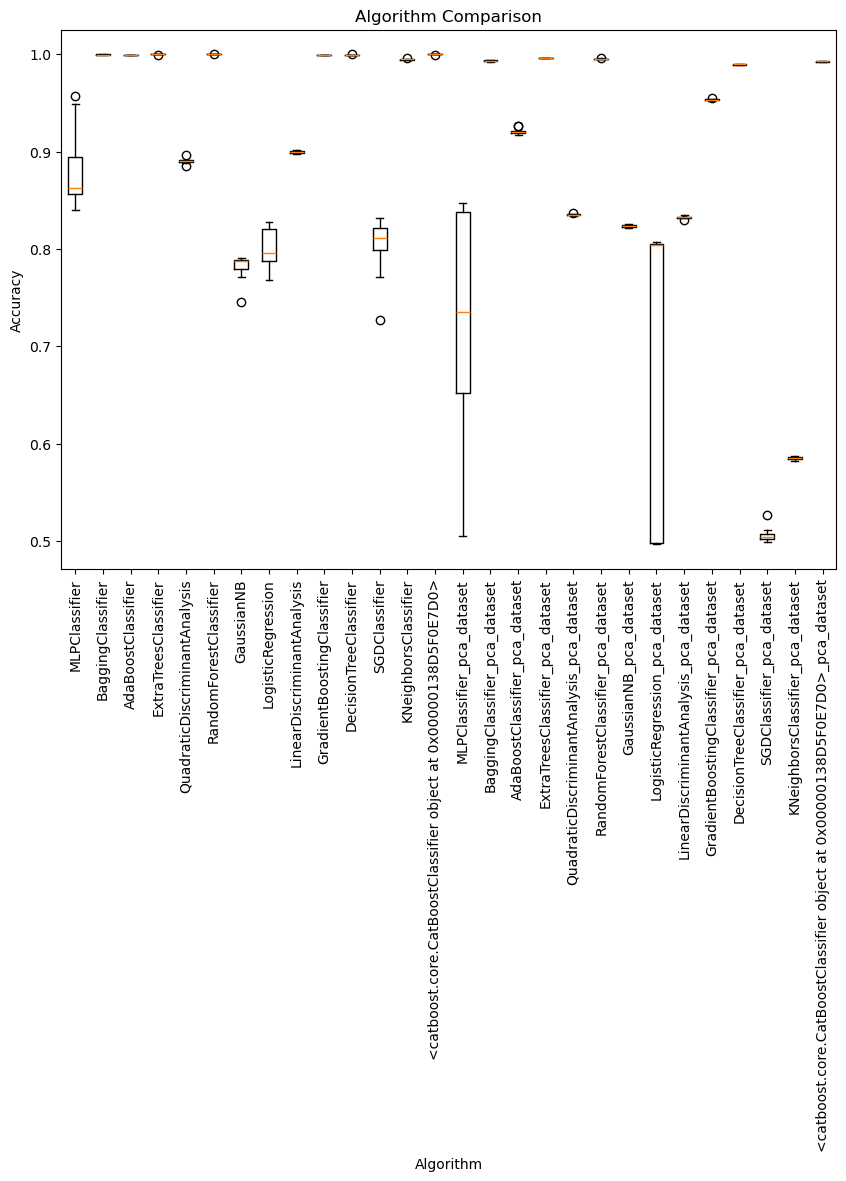

In [21]:
model_set = [
    MLPClassifier(),
    BaggingClassifier(n_jobs=-1),
    AdaBoostClassifier(),
    ExtraTreesClassifier(n_jobs=-1),
    QuadraticDiscriminantAnalysis(),
    RandomForestClassifier(n_jobs=-1),
    GaussianNB(),
    LogisticRegression(n_jobs=-1),
    LinearDiscriminantAnalysis(),
    GradientBoostingClassifier(),
    DecisionTreeClassifier(),
    SGDClassifier(n_jobs=-1),
    KNeighborsClassifier(n_jobs=-1),
    CatBoostClassifier(logging_level='Silent'),
]

def filter_parentheses(content):
    regex = r'\([^()]*\)'
    while re.search(regex, content):
        content = re.sub(regex, '', content)
    return content

model_performance = []
names = [filter_parentheses(str(i)) for i in model_set] + [filter_parentheses(str(i)) + '_pca_dataset' for i in model_set]

for model in model_set:
    kfold = KFold(n_splits=10, random_state=42, shuffle=True)
    print(filter_parentheses(str(model)))
    cv_results = cross_val_score(model,all_inputs, all_labels, cv=kfold, scoring='accuracy', n_jobs=-1)
    print(cv_results)
    model_performance.append(cv_results)

for model in model_set:
    kfold = KFold(n_splits=10, random_state=42, shuffle=True)
    print(filter_parentheses(str(model)) + "_pca")
    cv_results = cross_val_score(model,all_inputs_pca, all_labels_pca, cv=kfold, scoring='accuracy', n_jobs=-1)
    print(cv_results)
    model_performance.append(cv_results)

accuracy = []
index = 0

for i in model_performance:
    for j in i:
        accuracy.append({'model': names[index], 'accuracy': j})
    index += 1

accuracy = pd.DataFrame(accuracy, index=None)
accuracy.to_csv("data/model_cross_val_score")

plt.figure(figsize=(10,7))
plt.boxplot(model_performance, labels=names)
plt.title('Algorithm Comparison')
plt.xlabel('Algorithm')
plt.ylabel('Accuracy')
plt.xticks(rotation=90)

plt.show()

62.535173416137695
MLPClassifier
15.716566324234009
BaggingClassifier
75.28909683227539
AdaBoostClassifier
7.0730860233306885
ExtraTreesClassifier
0.6770017147064209
QuadraticDiscriminantAnalysis
23.01800227165222
RandomForestClassifier
0.5379977226257324
GaussianNB
3.8610517978668213
LogisticRegression
1.2259957790374756
LinearDiscriminantAnalysis
282.7818851470947
GradientBoostingClassifier
12.393644332885742
DecisionTreeClassifier
9.883510112762451
SGDClassifier
0.41299986839294434
KNeighborsClassifier
31.087323904037476
106.6869056224823
MLPClassifier_pca
9.437398672103882
BaggingClassifier_pca
44.247119426727295
AdaBoostClassifier_pca
4.506546497344971
ExtraTreesClassifier_pca
0.42400074005126953
QuadraticDiscriminantAnalysis_pca
21.770081043243408
RandomForestClassifier_pca
0.42800235748291016
GaussianNB_pca
1.6956086158752441
LogisticRegression_pca
0.8470008373260498
LinearDiscriminantAnalysis_pca
128.094975233078
GradientBoostingClassifier_pca
6.075021266937256
DecisionTreeClas

C:\Users\Utilizador\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


33.49409031867981
SGDClassifier_pca
0.8019990921020508
KNeighborsClassifier_pca
26.84364366531372
<catboost.core.CatBoostClassifier object at 0x00000138BAF29010>_pca


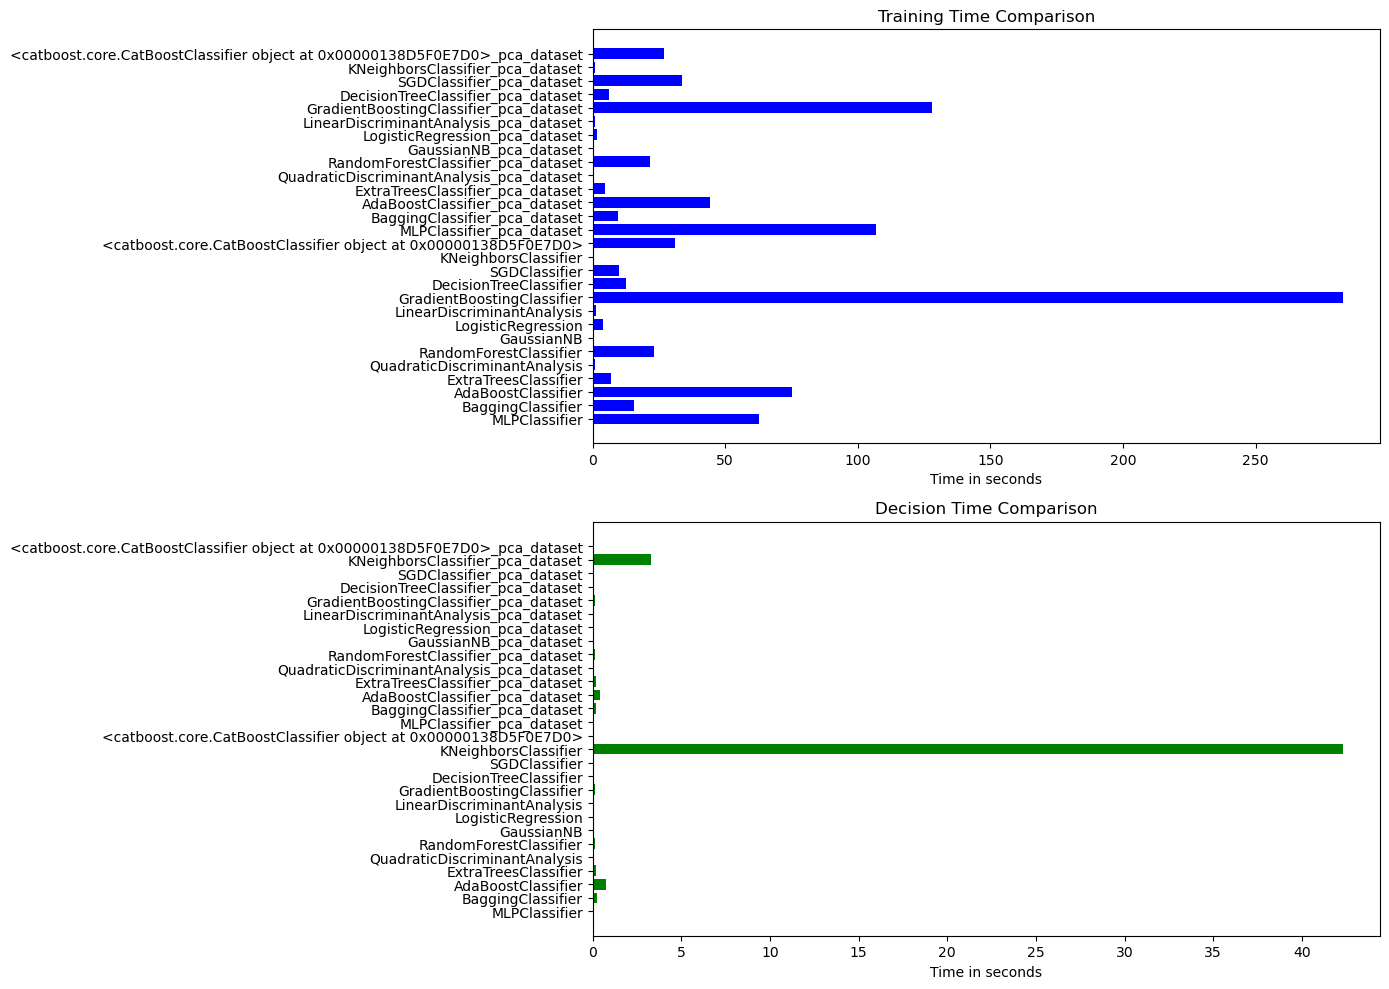

In [22]:
X_train, X_test, y_train, y_test = train_test_split(all_inputs, all_labels, test_size=test_size, random_state=42)

train_times = []
decision_times = []

for model in model_set:
    start_time = time()
    model.fit(X_train, y_train)
    end_time = time() - start_time
    train_times.append(end_time)
    print(end_time)
    print(filter_parentheses(str(model)))

    start_time = time()
    model.predict(X_test)
    decision_times.append(time() - start_time)
    
X_train, X_test, y_train, y_test = train_test_split(all_inputs_pca, all_labels_pca, test_size=test_size, random_state=42)

model_set_pca = copy.deepcopy(model_set)

for model in model_set_pca:
    start_time = time()
    model.fit(X_train, y_train)
    end_time = time() - start_time
    print(end_time)
    print(filter_parentheses(str(model)) + "_pca")
    train_times.append(time() - start_time)

    start_time = time()
    model.predict(X_test)
    decision_times.append(time() - start_time)
    
csv = pd.DataFrame({"Mode Name":names, 'Training Time': train_times, 'Decision Time': decision_times})

csv.to_csv("data/model_execution_time.csv",index=False)
    
fig, ax = plt.subplots(2, 1, figsize=(14, 10))
ax[0].barh(names, train_times, color='blue')
ax[0].set_title('Training Time Comparison')
ax[0].set_xlabel('Time in seconds')

ax[1].barh(names, decision_times, color='green')
ax[1].set_title('Decision Time Comparison')
ax[1].set_xlabel('Time in seconds')

plt.tight_layout()
plt.show()

MLPClassifier
BaggingClassifier
AdaBoostClassifier
ExtraTreesClassifier
QuadraticDiscriminantAnalysis
RandomForestClassifier
GaussianNB
LogisticRegression
LinearDiscriminantAnalysis
GradientBoostingClassifier
DecisionTreeClassifier
SGDClassifier
KNeighborsClassifier


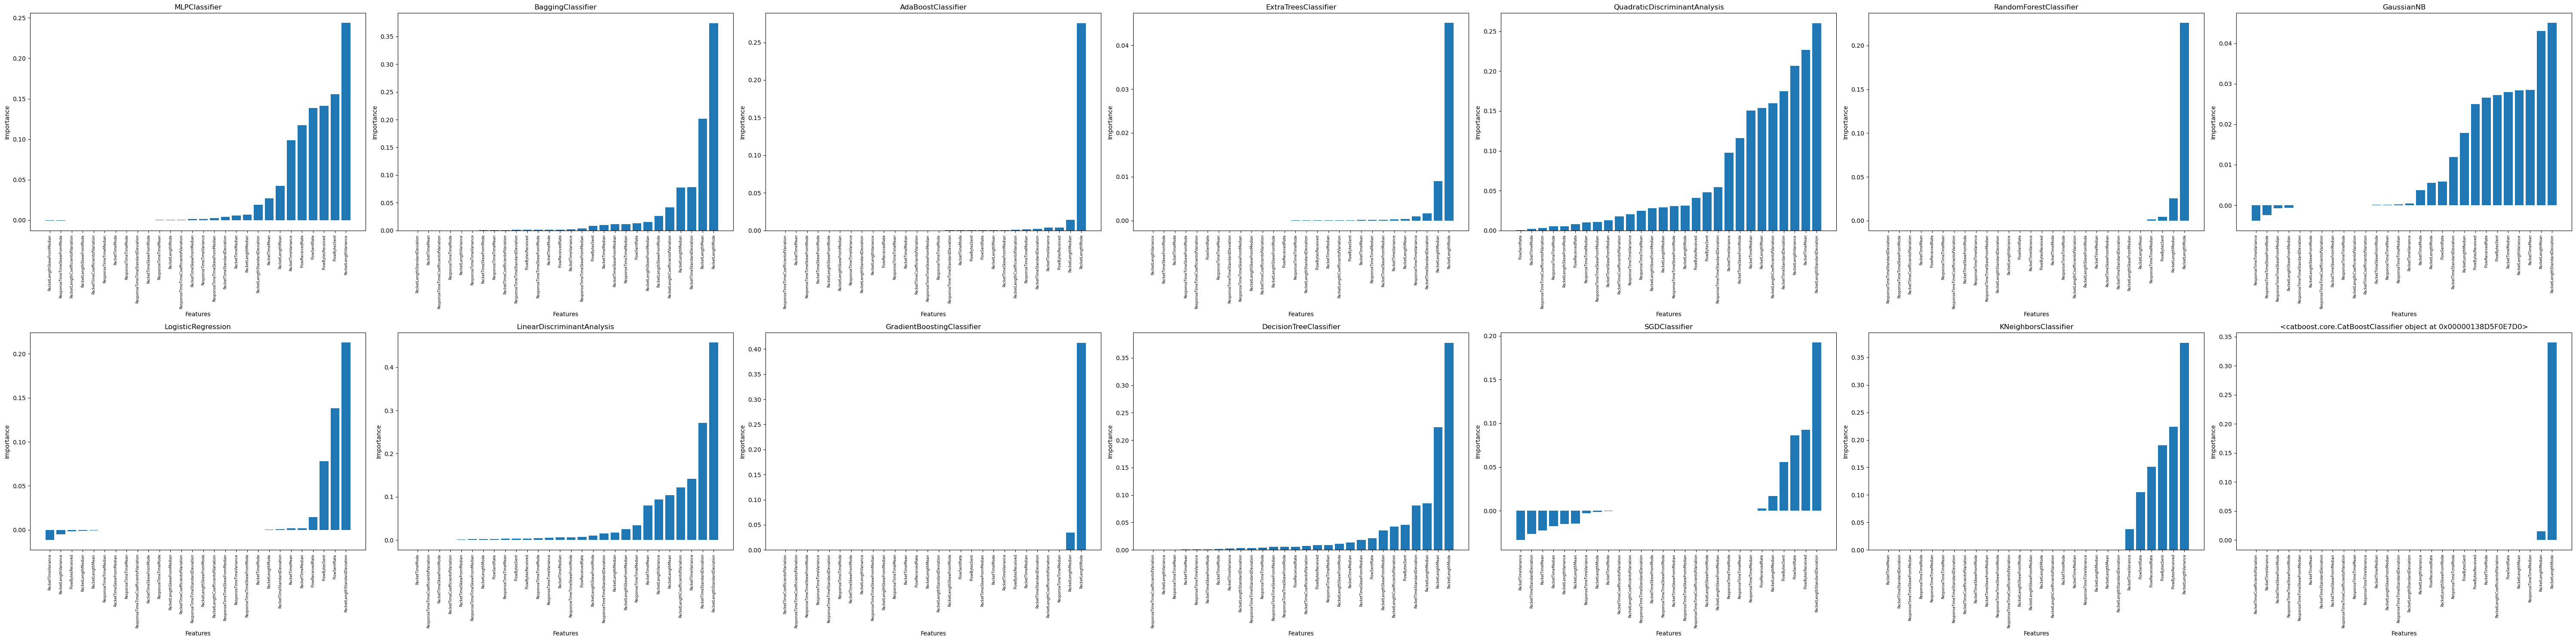

<Figure size 6000x1500 with 0 Axes>

<Figure size 6000x1500 with 0 Axes>

In [23]:
from sklearn.inspection import permutation_importance

i = 0
plt.figure(figsize=(60,15))

feature_importances = {}

for model in model_set:
    importances = permutation_importance(model, all_inputs, all_labels, n_repeats=1, random_state=42, n_jobs=-1)
    print(names[i])
    
    features = all_inputs.columns
    model_results_df = pd.DataFrame({'Mean Importance': importances.importances_mean, 'Std Dev': importances.importances_std}, index=features)
    model_results_df.to_csv("data/feature_importances" + names[i].replace('<','').replace('>','') + ".csv")

    sorted_idx = importances.importances_mean.argsort()
    feature_importances[names[i]] = importances.importances_mean

    ax = plt.subplot(2, 7, i + 1)
    ax.bar(range(len(sorted_idx)), importances.importances_mean[sorted_idx], yerr=importances.importances_std[sorted_idx])
    ax.set_title(names[i])
    ax.set_xlabel('Features')
    ax.set_ylabel('Importance')
    ax.set_xticks(range(len(sorted_idx)))
    ax.set_xticklabels(features[sorted_idx], rotation=90, fontsize=6)

    i += 1

plt.tight_layout()
plt.show()


MLPClassifier_pca_dataset_pca
BaggingClassifier_pca_dataset_pca
AdaBoostClassifier_pca_dataset_pca
ExtraTreesClassifier_pca_dataset_pca
QuadraticDiscriminantAnalysis_pca_dataset_pca
RandomForestClassifier_pca_dataset_pca
GaussianNB_pca_dataset_pca
LogisticRegression_pca_dataset_pca
LinearDiscriminantAnalysis_pca_dataset_pca
GradientBoostingClassifier_pca_dataset_pca
DecisionTreeClassifier_pca_dataset_pca
SGDClassifier_pca_dataset_pca
KNeighborsClassifier_pca_dataset_pca
<catboost.core.CatBoostClassifier object at 0x00000138D5F0E7D0>_pca_dataset_pca


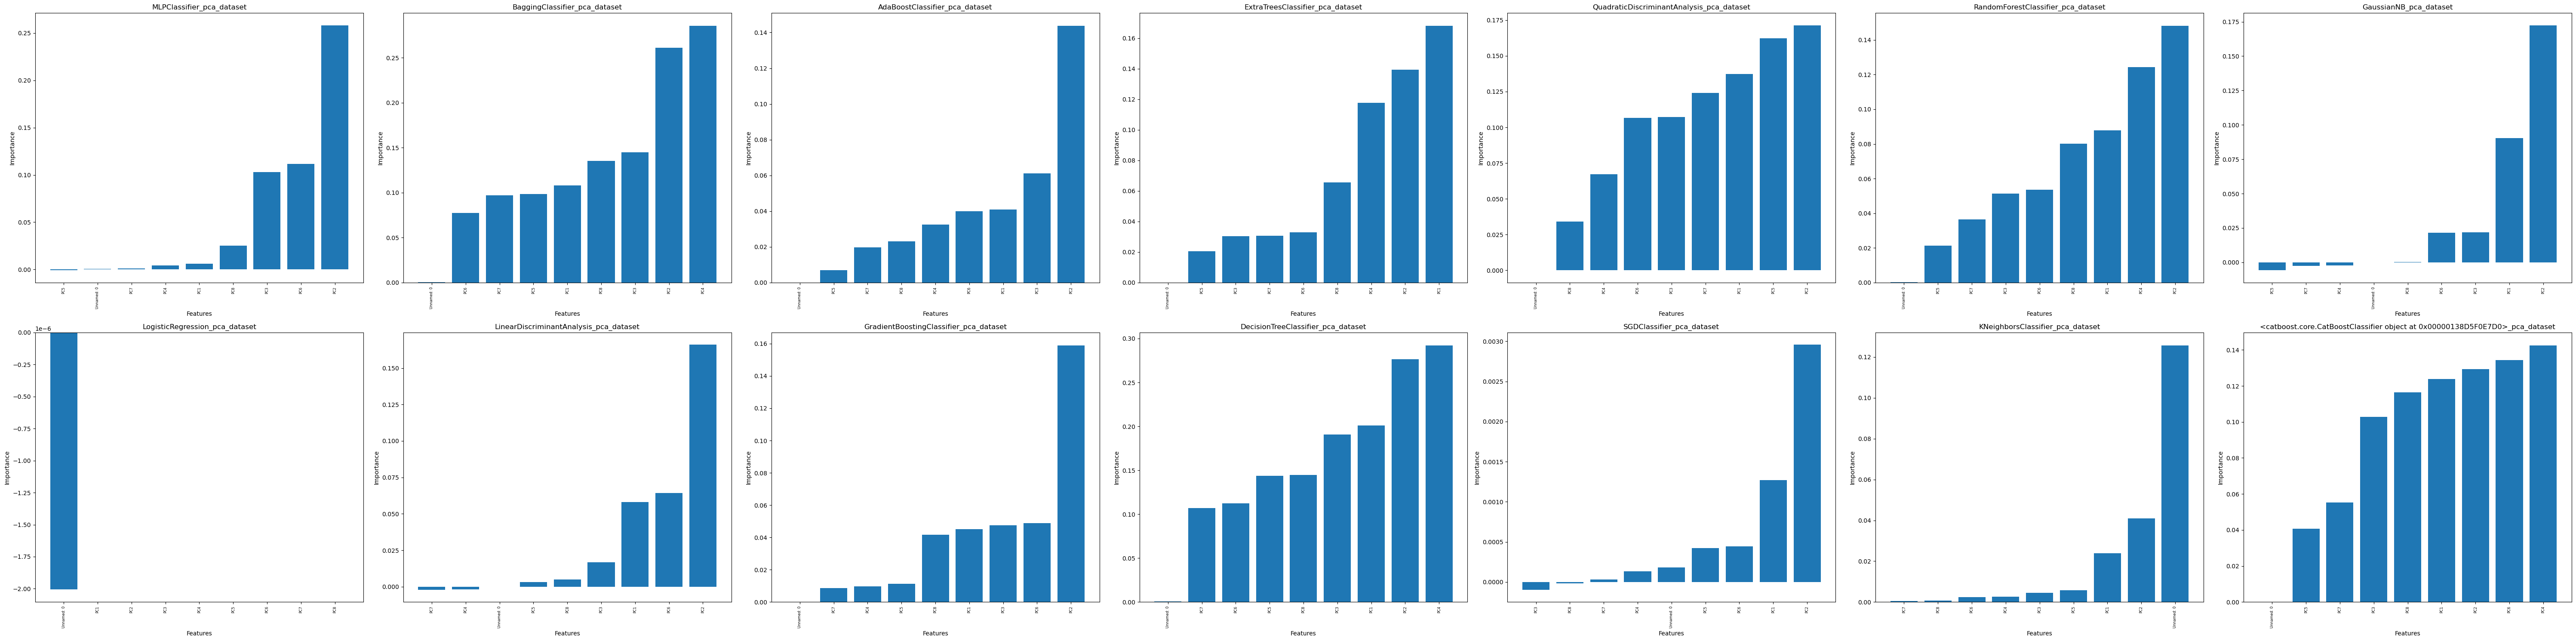

In [32]:
plt.figure(figsize=(60,15))
i = 14
a = 0

for model in model_set_pca:
    importances = permutation_importance(model, all_inputs_pca, all_labels_pca, n_repeats=1, random_state=42, n_jobs=-1)
    print(names[i] + "_pca")

    features = all_inputs_pca.columns
    model_results_df = pd.DataFrame({'Mean Importance': importances.importances_mean, 'Std Dev': importances.importances_std}, index=features)
    model_results_df.to_csv("data/feature_importances" + names[i].replace('<','').replace('>','') + "_pca.csv")
    sorted_idx = importances.importances_mean.argsort()
    feature_importances[names[i]] = importances.importances_mean

    ax = plt.subplot(2, 7, a + 1)
    ax.bar(range(len(sorted_idx)), importances.importances_mean[sorted_idx], yerr=importances.importances_std[sorted_idx])
    ax.set_title(names[i])
    ax.set_xlabel('Features')
    ax.set_ylabel('Importance')
    ax.set_xticks(range(len(sorted_idx)))
    ax.set_xticklabels(all_inputs_pca.columns[sorted_idx], rotation=90, fontsize=6)

    i += 1
    a += 1
    
plt.tight_layout()
plt.show()


MLPClassifier
[5, 7, 8, 9, 10, 11, 13, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]
[0.84720803 0.84863056 0.88467472 0.87309411 0.84945202 0.94820781
 0.86579844 0.86834302 0.88561411 0.84892807]

BaggingClassifier
[0, 1, 2, 3, 4, 5, 9, 10, 12, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]
[0.99981968 0.99985975 0.99977961 0.99977961 0.99969947 0.99977961
 0.9997796  0.99979964 0.9997195  0.99983971]

AdaBoostClassifier
[0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]
[0.99436998 0.99380898 0.99443009 0.99443009 0.99422973 0.99475066
 0.99400922 0.99513124 0.99314767 0.9941094 ]

ExtraTreesClassifier
[0, 1, 2, 3, 4, 5, 6, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]
[0.99981968 0.99981968 0.99979964 0.99989982 0.99989982 0.99977961
 0.99979964 0.99987978 0.99985975 0.99993989]

QuadraticDiscriminantAnalysis
[1, 3, 10, 16, 17, 19, 20, 22, 23, 24, 25, 27]
[0.92654926 0.92398469 0.92396466 0

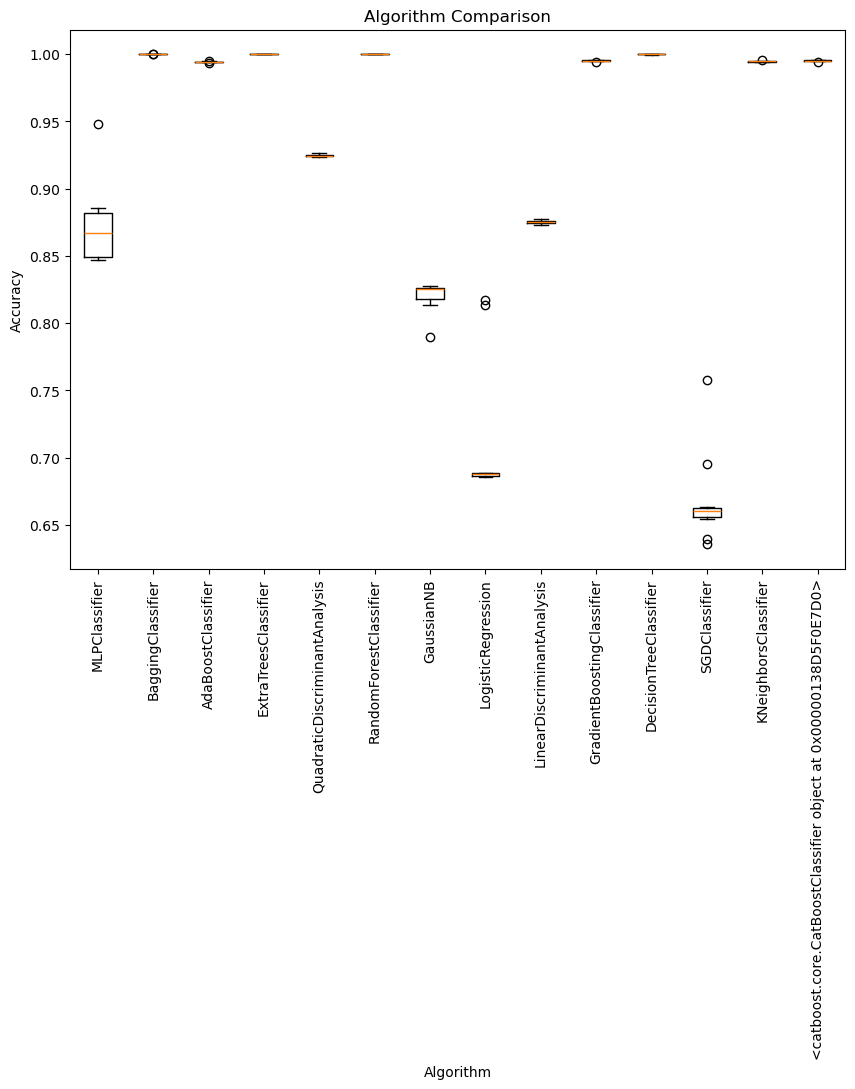

KeyError: 'MLPClassifier_pca_dataset'

In [27]:
i = 0

new_model_performance = []

for model in model_set:
    kfold = KFold(n_splits=10, random_state=42, shuffle=True)
    threshold = max(feature_importances[names[i]]) / 10
    indexes = [index for index, value in enumerate(feature_importances[names[i]]) if value  < threshold]
    
    data_subset = data.drop(columns=data.columns[indexes])
    x = data_subset.drop(columns=['Label'])
    y = data_subset['Label']

    cv_results = cross_val_score(model,x, y, cv=kfold, scoring='accuracy', n_jobs=-1)
    new_model_performance.append(cv_results)
    
    print(names[i])
    print(indexes)
    print(cv_results)
    print()
    
    i += 1
    
print(len(new_model_performance))

def average(lst):
    return sum(lst) / len(lst)

# for j,count in enumerate(new_model_performance):
#     avg_new = average(new_model_performance[j])
#     avg_old = average(model_performance[j])
#     print(names[j] + ": " + str(avg_new) + ", " + str(avg_old))
    
plt.figure(figsize=(10,7))
plt.boxplot(new_model_performance, labels=names[:14])
plt.title('Algorithm Comparison')
plt.xlabel('Algorithm')
plt.ylabel('Accuracy')
plt.xticks(rotation=90)
plt.show()


(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(1, 0, 'MLPClassifier_pca_dataset'),
  Text(2, 0, 'BaggingClassifier_pca_dataset'),
  Text(3, 0, 'AdaBoostClassifier_pca_dataset'),
  Text(4, 0, 'ExtraTreesClassifier_pca_dataset'),
  Text(5, 0, 'QuadraticDiscriminantAnalysis_pca_dataset'),
  Text(6, 0, 'RandomForestClassifier_pca_dataset'),
  Text(7, 0, 'GaussianNB_pca_dataset'),
  Text(8, 0, 'LogisticRegression_pca_dataset'),
  Text(9, 0, 'LinearDiscriminantAnalysis_pca_dataset'),
  Text(10, 0, 'GradientBoostingClassifier_pca_dataset'),
  Text(11, 0, 'DecisionTreeClassifier_pca_dataset'),
  Text(12, 0, 'SGDClassifier_pca_dataset'),
  Text(13, 0, 'KNeighborsClassifier_pca_dataset'),
  Text(14, 0, '<catboost.core.CatBoostClassifier object at 0x00000138D5F0E7D0>_pca_dataset')])

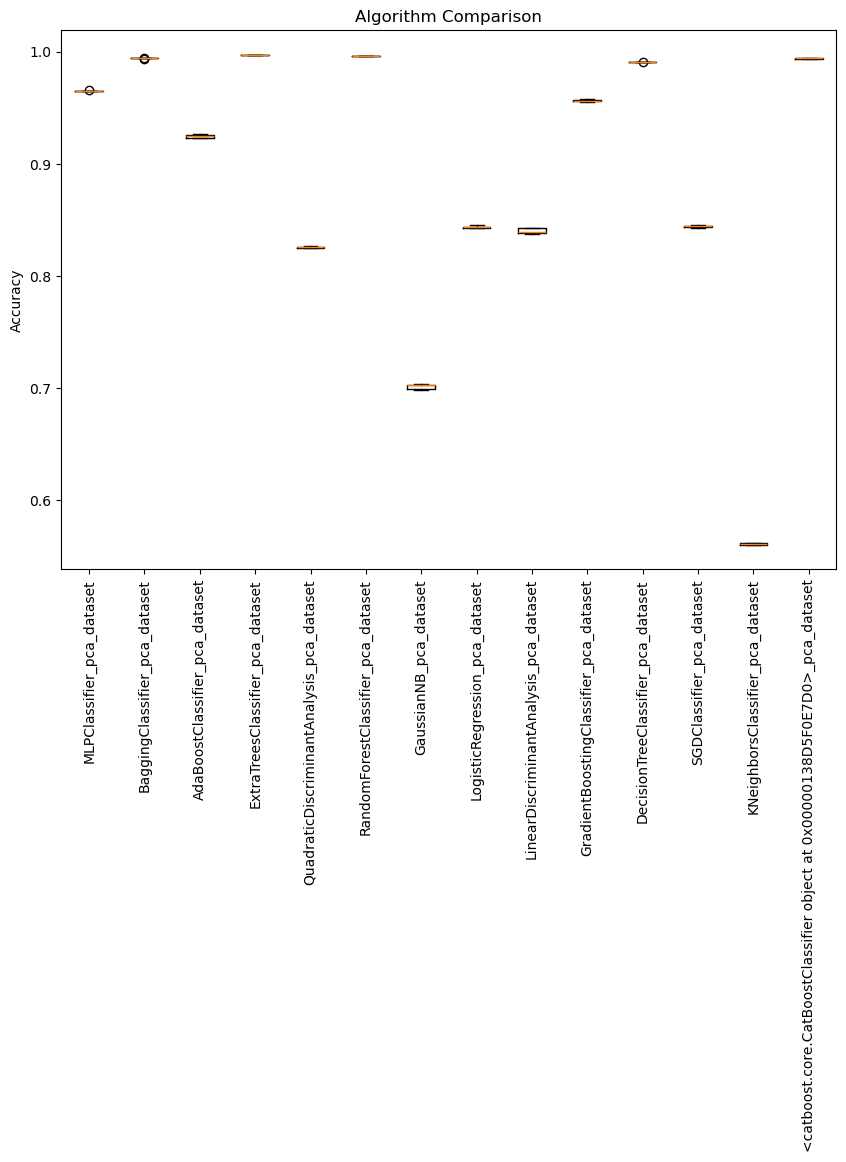

In [37]:
i = 14

for model in model_set_pca:
    kfold = KFold(n_splits=5, random_state=42, shuffle=True)
    print(names[i])
    print(feature_importances[names[i]])
    threshold = max(feature_importances[names[i]]) / 10
    indexes = [index for index, value in enumerate(feature_importances[names[i]]) if value < threshold]

    data_subset = data_pca.drop(columns=data_pca.columns[indexes])
    x = data_subset.drop(columns=['Label'])
    y = data_subset['Label']

    cv_results = cross_val_score(model,x, y, cv=kfold, scoring='accuracy', n_jobs=-1)
    new_model_performance.append(cv_results)

    print(names[i])
    print(indexes)
    print(cv_results)
    print()
    i += 1

plt.figure(figsize=(10,7))
plt.boxplot(new_model_performance[14:], labels=names[14:])
plt.title('Algorithm Comparison')
plt.ylabel('Accuracy')
plt.xticks(rotation=90)

In [ ]:
accuracies = {}

i = 0
for performance in performance_metrics:
    accuracies[names[i]] = average(performance)
    i += 1

i = 0
for performance in new_model_performance:
    accuracies[names[i] + "_reduced_data"] = average(performance)
    i += 1
    
accuracies = pd.DataFrame(accuracies)
accuracies.to_csv("algo_accuracy.csv")